## Лабораторная работа №2. Реализация глубокой нейронной сети

#### Данные: 
В работе предлагается использовать набор данных notMNIST, который состоит из изображений размерностью 28×28 первых 10 букв латинского алфавита (A … J, соответственно). 
Обучающая выборка содержит порядка 500 тыс. изображений, а тестовая – около 19 тыс.
#### Ход выполнения:
###### Задание 1.
Реализуйте полносвязную нейронную сеть с помощью библиотеки Tensor Flow.
В качестве алгоритма оптимизации можно использовать, например, стохастический градиент (Stochastic Gradient Descent, SGD). 
Определите количество скрытых слоев от 1 до 5, количество нейронов в каждом из слоев до нескольких сотен, 
а также их функции активации (кусочно-линейная, сигмоидная, гиперболический тангенс и т.д.).

Используем данные, которые сгенерировали в лабораторной работ №1. Загрузим из файла notMNIST.pickle

In [1]:
from __future__ import print_function

from six.moves import cPickle as pickle

pickle_file = '../lab1/notMNIST.pickle'

with open(pickle_file, 'rb') as file:
    saved_pickle = pickle.load(file)
    train_dataset = saved_pickle['train_dataset']
    train_labels = saved_pickle['train_labels']
    valid_dataset = saved_pickle['valid_dataset']
    valid_labels = saved_pickle['valid_labels']
    test_dataset = saved_pickle['test_dataset']
    test_labels = saved_pickle['test_labels']
    del saved_pickle  # gc free up memory
    print('Training set', train_dataset.shape, train_labels.shape)
    print('Validation set', valid_dataset.shape, valid_labels.shape)
    print('Test set', test_dataset.shape, test_labels.shape)


Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (18000, 28, 28) (18000,)


Отобразим несколько экзепляров из набора данных.

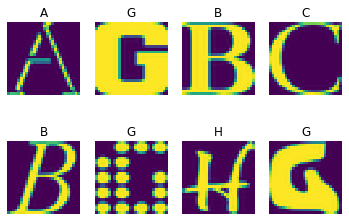

In [2]:
import matplotlib.pyplot as plt
import random

%matplotlib inline


pretty_labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J'}

def disp_sample_dataset(dataset, labels, title=None):
    fig = plt.figure()
    if title: fig.suptitle(title, fontsize=16, fontweight='bold')
    items = random.sample(range(len(labels)), 8)
    for i, item in enumerate(items):
        plt.subplot(2, 4, i + 1)
        plt.axis('off')
        plt.title(chr(ord('A') + labels[item]))
        plt.imshow(dataset[item])
    plt.show()
 
disp_sample_dataset(train_dataset, train_labels)

Преобразуем данные, чтобы были более адаптированы к модели, которую собираемся тренировать:

- данные в виде матрицы
- маркеры в виде one-hot кодировки

In [3]:
import tensorflow as tf

train_images = train_dataset.reshape(200000, 784).astype('float32') / 255.0
valid_images = valid_dataset.reshape(10000, 784).astype('float32') / 255.0
test_images = test_dataset.reshape(18000, 784).astype('float32') / 255.0

print(train_images.shape[0], 'train samples')
print(valid_images.shape[0], 'validation samples')
print(test_images.shape[0], 'test samples')

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
valid_labels = tf.keras.utils.to_categorical(valid_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

200000 train samples
10000 validation samples
18000 test samples


Используем библиотеку TensorFlow (v.2) для реализации полносвязной нейронной сети.  
  
Добавим 3 полносвязных слоя (Dense). Первые два будут использовать 'RELu' в качестве функции активации, последний 'Softmax' для определения маркера класса от 0..10. Отобразим построенную модель.

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim=784, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 100,710
Trainable params: 100,710
Non-trainable params: 0
_________________________________________________________________


Используем в качестве алгоритма оптимизации Adam, т.к. скорость работы и качество лучше, чем у SGD.

In [5]:
from tensorflow.keras.optimizers import Adam

def train_model(nn_model):
    adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    nn_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

    train_history = nn_model.fit(train_images, train_labels, batch_size=128, epochs=15, verbose=2, validation_data=(valid_images, valid_labels))
    return train_history

history = train_model(model)

Train on 200000 samples, validate on 10000 samples
Epoch 1/15
200000/200000 - 3s - loss: 0.7892 - accuracy: 0.7874 - val_loss: 0.5848 - val_accuracy: 0.8343
Epoch 2/15
200000/200000 - 3s - loss: 0.5383 - accuracy: 0.8422 - val_loss: 0.5090 - val_accuracy: 0.8488
Epoch 3/15
200000/200000 - 3s - loss: 0.4859 - accuracy: 0.8544 - val_loss: 0.4692 - val_accuracy: 0.8593
Epoch 4/15
200000/200000 - 3s - loss: 0.4535 - accuracy: 0.8624 - val_loss: 0.4426 - val_accuracy: 0.8665
Epoch 5/15
200000/200000 - 3s - loss: 0.4283 - accuracy: 0.8701 - val_loss: 0.4230 - val_accuracy: 0.8716
Epoch 6/15
200000/200000 - 4s - loss: 0.4079 - accuracy: 0.8763 - val_loss: 0.4074 - val_accuracy: 0.8757
Epoch 7/15
200000/200000 - 3s - loss: 0.3909 - accuracy: 0.8816 - val_loss: 0.3948 - val_accuracy: 0.8786
Epoch 8/15
200000/200000 - 3s - loss: 0.3765 - accuracy: 0.8859 - val_loss: 0.3854 - val_accuracy: 0.8826
Epoch 9/15
200000/200000 - 4s - loss: 0.3638 - accuracy: 0.8895 - val_loss: 0.3750 - val_accuracy: 0.

Отобразим графики точности обучения и потерь.

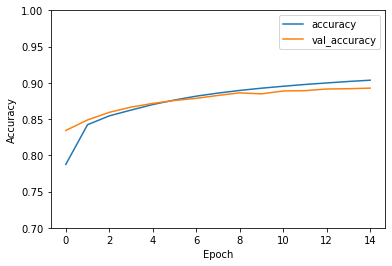

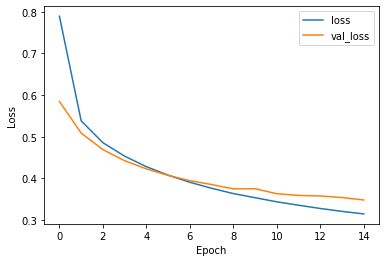

In [6]:
def plot_history(history_to_plot):
    plt.plot(history_to_plot.history['accuracy'], label='accuracy')
    plt.plot(history_to_plot.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.7, 1])
    plt.legend(loc='best')
    plt.show()

    plt.plot(history_to_plot.history['loss'], label='loss')
    plt.plot(history_to_plot.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    plt.show()
 
plot_history(history)    

###### Задание 2.
Как улучшилась точность классификатора по сравнению с логистической регрессией?

In [7]:
def test_model(test_on_model):
    test_loss, test_accuracy = test_on_model.evaluate(test_images, test_labels, verbose=2)
    print('Test accuracy = {0:.2f}%\nTest loss = {1:.2f}%'.format(test_accuracy*100.0, test_loss*100.0))

test_model(model)

18000/1 - 0s - loss: 0.2321 - accuracy: 0.9486
Test accuracy = 94.86%
Test loss = 17.63%


По сравнению с логистической регрессией из 1 лабораторной работы точность выросла с 88.7% до 94.9%.


###### Задание 3.
Используйте регуляризацию и метод сброса нейронов (dropout) для борьбы с переобучением. Как улучшилось качество классификации?


In [8]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(100, input_dim=784, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_4 (Dense)              (None, 200)               20200     
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 101,110
Trainable params: 100,910
Non-trainable params: 200
_________________________________________________________________


Train on 200000 samples, validate on 10000 samples
Epoch 1/15
200000/200000 - 5s - loss: 0.5966 - accuracy: 0.8246 - val_loss: 0.4651 - val_accuracy: 0.8574
Epoch 2/15
200000/200000 - 4s - loss: 0.4706 - accuracy: 0.8578 - val_loss: 0.4297 - val_accuracy: 0.8677
Epoch 3/15
200000/200000 - 4s - loss: 0.4340 - accuracy: 0.8674 - val_loss: 0.4062 - val_accuracy: 0.8721
Epoch 4/15
200000/200000 - 4s - loss: 0.4115 - accuracy: 0.8736 - val_loss: 0.3837 - val_accuracy: 0.8823
Epoch 5/15
200000/200000 - 4s - loss: 0.3953 - accuracy: 0.8782 - val_loss: 0.3864 - val_accuracy: 0.8806
Epoch 6/15
200000/200000 - 4s - loss: 0.3835 - accuracy: 0.8820 - val_loss: 0.3730 - val_accuracy: 0.8832
Epoch 7/15
200000/200000 - 5s - loss: 0.3720 - accuracy: 0.8847 - val_loss: 0.3735 - val_accuracy: 0.8827
Epoch 8/15
200000/200000 - 5s - loss: 0.3643 - accuracy: 0.8867 - val_loss: 0.3552 - val_accuracy: 0.8915
Epoch 9/15
200000/200000 - 4s - loss: 0.3577 - accuracy: 0.8891 - val_loss: 0.3524 - val_accuracy: 0.

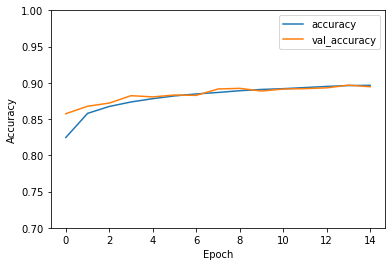

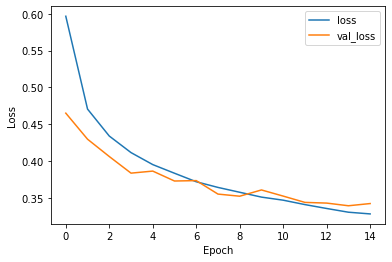

18000/1 - 1s - loss: 0.2079 - accuracy: 0.9486
Test accuracy = 94.86%
Test loss = 17.03%


In [9]:
history = train_model(model)
plot_history(history)
test_model(model)

###### Задание 4.
Воспользуйтесь динамически изменяемой скоростью обучения (learning rate). Наилучшая точность, достигнутая с помощью данной модели составляет 97.1%. Какую точность демонстрирует Ваша реализованная модель?

Так как используем Adam в качестве алгоритма оптимизации, нет необходимости настраивать динамически изменяемую скорость обучения (learning rate) - decay идет из коробки.   
  
tensorflow/tensorflow/python/training/adam.py  
Line 176 in f9c5e71  
 lr = (lr_t * math_ops.sqrt(1 - beta2_power) / (1 - beta1_power)) 


Таким образом, реализованная в данной лабораторной работе модель дает результат точности в 94.86%.